In [36]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.cluster import KMeans
import seaborn as sns


In [3]:
city_years = {
 'Francisco_Bay':[2016,2017,2018,2019,2020,2021,2022,2023],
}

In [4]:
path = '/Users/zahrafarook/Desktop/DataAnalysis/data'
dir_list = os.listdir(path)
print(dir_list)

['cnc', 'Virginia', '.DS_Store', 'San_Franciso', 'France', 'San_Francisco_Bay_2020.csv', 'San_Francisco_Bay_2021.csv', 'census_ethnicities', 'San_Francisco_Bay_2023.csv', 'San_Francisco_Bay_2022.csv', 'Los_Angeles_2017.csv', 'San_Francisco_Bay_2019.csv', 'San_Francisco_Bay_2018.csv', 'non_cnc', 'Bolivia', 'San_Francisco_Bay_2016.csv', 'northcarolina', 'UK', 'San_Francisco_Bay_2017.csv', 'Los_Angeles', 'India', 'Texas', 'old data']


In [6]:
dfs = defaultdict(dict)
dfall = []


for city, years in city_years.items():
    for year in years:
        print("Loading: ", city, year)

        df = pd.read_csv("/Users/zahrafarook/Desktop/DataAnalysis/data/San_{}_{}.csv".format(city, year))
       
        #creating a column to add weekend or weekday
        df['time_observed_at'] = pd.to_datetime(df['time_observed_at'], utc=True)
        df['day_of_week'] = df['time_observed_at'].dt.dayofweek
        df['day_type'] = df['time_observed_at'].apply(lambda x: 'Weekend' if x.weekday() in [5, 6] else 'Weekday')
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['Francisco_Bay'][2016].head()

Loading:  Francisco_Bay 2016
Loading:  Francisco_Bay 2017
Loading:  Francisco_Bay 2018
Loading:  Francisco_Bay 2019
Loading:  Francisco_Bay 2020
Loading:  Francisco_Bay 2021
Loading:  Francisco_Bay 2022
Loading:  Francisco_Bay 2023


,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,20069,1:15 pm.,2016-07-14,2016-07-14 20:15:00+00:00,America/Los_Angeles,2011-06-03T14:51:45-07:00,2020-02-09T08:18:18-08:00,Seen in grass. Individual had >5 ticks from e...,1704,casual,...,genus,797512.0,False,False,False,36300.0,36300.0,"[{'user_id': 1704, 'category': 'leading', 'dis...",3.0,Weekday
1,20070,1:00 pm.,2016-03-25,2016-03-25 20:00:00+00:00,America/Los_Angeles,2011-06-03T14:53:13-07:00,2020-02-09T08:18:11-08:00,Female mallard duck with multiple ducklings.,1704,casual,...,species,6922.0,True,False,False,462859.0,462859.0,"[{'user_id': 642, 'category': 'leading', 'disa...",4.0,Weekday
2,68373,6:30,2016-02-12,2016-02-12 14:30:00+00:00,America/Los_Angeles,2012-04-20T20:36:48-07:00,2020-08-01T14:11:59-07:00,This flower has blue/purple petals that are di...,5844,casual,...,genus,632394.0,False,False,False,98028.0,98028.0,"[{'user_id': 5844, 'category': 'leading', 'dis...",4.0,Weekday
3,158736,2:19,2016-10-14,2016-10-14 21:19:00+00:00,America/Los_Angeles,2012-12-06T20:23:52-08:00,2016-10-14T01:56:44-07:00,We saw our first devil's coach-horse beetle as...,11548,casual,...,species,1270925.0,False,False,False,10365.0,10365.0,"[{'user_id': 11548, 'category': 'leading', 'di...",4.0,Weekday
4,538018,2016-04-10 2:20:00 PM PDT,2016-04-10,2016-04-10 21:20:00+00:00,America/Los_Angeles,2014-02-20T15:40:40-08:00,2016-04-10T21:06:27-07:00,NaN,16603,research,...,species,36141.0,True,False,False,119535.0,119535.0,"[{'user_id': 16603, 'category': 'improving', '...",6.0,Weekend


In [15]:
sf_2016 = dfs['Francisco_Bay'][2016]
sf_2017 = dfs['Francisco_Bay'][2017]
sf_2018 = dfs['Francisco_Bay'][2018]
sf_2019 = dfs['Francisco_Bay'][2019]
sf_2020 = dfs['Francisco_Bay'][2020]
sf_2021 = dfs['Francisco_Bay'][2021]
sf_2022 = dfs['Francisco_Bay'][2022]
sf_2023 = dfs['Francisco_Bay'][2023]

In [16]:
sf_2016

,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,20069,1:15 pm.,2016-07-14,2016-07-14 20:15:00+00:00,America/Los_Angeles,2011-06-03T14:51:45-07:00,2020-02-09T08:18:18-08:00,Seen in grass. Individual had >5 ticks from e...,1704,casual,...,genus,797512.0,False,False,False,36300.0,36300.0,"[{'user_id': 1704, 'category': 'leading', 'dis...",3.0,Weekday
1,20070,1:00 pm.,2016-03-25,2016-03-25 20:00:00+00:00,America/Los_Angeles,2011-06-03T14:53:13-07:00,2020-02-09T08:18:11-08:00,Female mallard duck with multiple ducklings.,1704,casual,...,species,6922.0,True,False,False,462859.0,462859.0,"[{'user_id': 642, 'category': 'leading', 'disa...",4.0,Weekday
2,68373,6:30,2016-02-12,2016-02-12 14:30:00+00:00,America/Los_Angeles,2012-04-20T20:36:48-07:00,2020-08-01T14:11:59-07:00,This flower has blue/purple petals that are di...,5844,casual,...,genus,632394.0,False,False,False,98028.0,98028.0,"[{'user_id': 5844, 'category': 'leading', 'dis...",4.0,Weekday
3,158736,2:19,2016-10-14,2016-10-14 21:19:00+00:00,America/Los_Angeles,2012-12-06T20:23:52-08:00,2016-10-14T01:56:44-07:00,We saw our first devil's coach-horse beetle as...,11548,casual,...,species,1270925.0,False,False,False,10365.0,10365.0,"[{'user_id': 11548, 'category': 'leading', 'di...",4.0,Weekday
4,538018,2016-04-10 2:20:00 PM PDT,2016-04-10,2016-04-10 21:20:00+00:00,America/Los_Angeles,2014-02-20T15:40:40-08:00,2016-04-10T21:06:27-07:00,NaN,16603,research,...,species,36141.0,True,False,False,119535.0,119535.0,"[{'user_id': 16603, 'category': 'improving', '...",6.0,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140615,191063817,2016/12/17 10:34 AM,2016-12-17,2016-12-17 18:34:00+00:00,America/Los_Angeles,2023-11-14T21:05:47-08:00,2023-11-16T13:53:32-08:00,NaN,781032,research,...,species,37763.0,True,False,False,6656.0,6656.0,"[{'user_id': 781032, 'category': 'improving', ...",5.0,Weekend
140616,191063820,2016/12/17 7:57 AM,2016-12-17,2016-12-17 15:57:00+00:00,America/Los_Angeles,2023-11-14T21:05:48-08:00,2023-11-14T21:06:31-08:00,NaN,781032,research,...,species,416305.0,False,False,False,1901.0,1901.0,"[{'user_id': 781032, 'category': 'improving', ...",5.0,Weekend
140617,191582930,2016/07/05 3:26 AM,2016-07-05,2016-07-05 10:26:00+00:00,America/Los_Angeles,2023-11-20T06:58:31-08:00,2023-11-20T08:23:04-08:00,NaN,6083433,needs_id,...,genus,9079.0,False,False,False,214341.0,214341.0,"[{'user_id': 6083433, 'category': 'improving',...",1.0,Weekday
140618,191851164,2016/01/12 10:30 AM,2016-01-12,2016-01-12 18:30:00+00:00,America/Los_Angeles,2023-11-23T07:45:15-08:00,2023-11-23T08:01:47-08:00,NaN,40959,research,...,species,4933.0,True,False,False,97492.0,97492.0,"[{'user_id': 40959, 'category': 'improving', '...",1.0,Weekday


# Calculate participation

## Get number of observations and identifications

In [17]:
def get_obs_ident_per_users(dfcity,year):
    """ Calculate the number of observations and identifications per user 
    
    Input:
    ------
     - dfcity: pd.DataFrame
         The observations data for one city.
     - year: int
         The year corresponding to the observations data.
    
    Returns:
    -------
     - dfobsident: pd.DataFrame
         Has the columns: user_id | year | n_obs | n_idents
    """
    
    n_obs = defaultdict(int)
    n_idents = defaultdict(int)
    
    for _, row in dfcity.iterrows():
        # Total count of observation made by each users
        user_obs = row['user_id']
        n_obs[user_obs] += 1 # Increment observation count for the user
        
        # Total identification user made
        identifications = row['identifications']
        if not pd.isnull(identifications):  # Check if 'identifications' is not NaN
            identifications = eval(identifications)
            for ident in identifications:
                user_ident = ident['user_id']
                if user_ident != user_obs:
                    n_idents[user_ident] += 1 # Increment identification count for the user
    
    # Aggregating results into a list of dictionaries
    obs_ident_list = []
    for user_id, obs_count in n_obs.items():
        obs_ident_list.append({
            'user_id': user_id,
            'n_obs': obs_count,
            'n_idents': n_idents[user_id],
            'day_type': row['day_type'],  # Include the 'day_type' column in the result
            'year': year,
            'time_observed_at': row['time_observed_at']
            
            
        })
    
    # Create DataFrame from the list of dictionaries
    dfobsident = pd.DataFrame(obs_ident_list)
    
    return dfobsident

In [30]:
# Initialize empty dictionary to store results for each year
sf_dataframes = {}

# Iterate over the years
for year in range(2016, 2024):
    # Extract DataFrame for the current year and city 'SF'
    dfcity = dfs['Francisco_Bay'][year]
    # Process data for the current year
    sf_dataframes[year] = get_obs_ident_per_users(dfcity, year)

#access dataframe for each year

In [31]:
sf_2016 = sf_dataframes[2016]
sf_2017 = sf_dataframes[2017]
sf_2018 = sf_dataframes[2018]
sf_2019 = sf_dataframes[2019]
sf_2020 = sf_dataframes[2020]
sf_2021 = sf_dataframes[2021]
sf_2022 = sf_dataframes[2022]
sf_2023 = sf_dataframes[2023]

In [32]:
df= [sf_2016,sf_2017,sf_2018,sf_2019,sf_2020,sf_2021,sf_2022,sf_2023]

### Function to do log trasnformation before clustering


In [22]:
#Function to do log trasnformation before clustering
def transform_data(df):
    # Step before log transformation to avoid the zeros
    df['obs_count_1'] = df['n_obs'] + 1
    df['ident_count_1'] = df['n_idents'] + 1

    # Log transform
    df['obs_count_log'] = np.log(df['obs_count_1'])
    df['ident_count_log'] = np.log(df['ident_count_1'])

    # Select variables for plotting
    df_select = df[['user_id', 'obs_count_log', 'ident_count_log']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['obs_count_log', 'ident_count_log']
    features = df_std[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.rename(columns={'obs_count_log': 'obs_count_scaled', 'ident_count_log': 'ident_count_scaled'}, inplace=True)
    df_std.sort_values('user_id', inplace=True)
    
    return df_std

# Test dataframe
#transformed_data = transform_data(sf_2016)
#print(transformed_data)


In [57]:
#k-means function without inertia
def perform_kmeans_clustering(df):
    label_dict = {0: 'high activity', 1: 'identifiers', 2: 'observers', 3: 'low activity'}

    kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000).fit(df[['obs_count_scaled', 'ident_count_scaled']])
    df['cluster'] = kmeans.labels_
    df['user_type'] = df['cluster'].map(label_dict)
    df = df.sort_values('user_id')  
    
    return df


In [41]:
#k-means function with inertia

def perform_kmeans_clustering_i(df, n_runs=10):
    label_dict = {0: 'high activity', 1: 'identifiers', 2: 'observers', 3: 'low activity'}

    best_inertia = float('inf')
    best_kmeans = None

    for _ in range(n_runs):
        kmeans = KMeans(n_clusters=4, random_state=None, max_iter=1000).fit(df[['obs_count_scaled', 'ident_count_scaled']])
        inertia = kmeans.inertia_

        if inertia < best_inertia:
            best_inertia = inertia
            best_kmeans = kmeans

    df['cluster'] = best_kmeans.labels_
    df['user_type'] = df['cluster'].map(label_dict)
    df = df.sort_values('user_id')  


    return df


In [33]:
#visualise

# Define color palette
color_dict = {
    'high activity': 'red',
    'identifiers': 'blue',
    'observers': 'green',
    'low activity': 'orange'
}

def visualize_clusters(df,year):
    sns.set(rc={'axes.facecolor': 'EFEFEF'})
    plt.figure(figsize=(6, 6))
    ax = plt.axes()
    sns.set(style="ticks")
    sns.scatterplot(data=df, x='obs_count_scaled', y='ident_count_scaled',
                    hue='user_type',
                    palette=color_dict,
                    s=30, linewidth=0, alpha=0.5)
    sns.set_style("ticks")
    plt.legend(loc='upper left')
    plt.title(f'K-Means Clustering - {year}', fontsize=16)
    #plt.title('K-means clustering', fontsize=16)
    plt.xlabel('Observation', fontsize=16)
    plt.ylabel('Identification', fontsize=16)
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,5)
    ax.set_facecolor("white")
    #plt.savefig(filename)
    plt.show()


In [46]:
def process_dataframe(df):
    # Log transformation
    df_log = transform_data(df)
    
    # K-Means Clustering on log transfored data
    df_clustered = perform_kmeans_clustering(df_log)
    
    #visualise
    visualize_clusters(df_clustered,year)
    
    return df



def perform_kmeans_clustering_z(df):
    label_dict = {0: 'high activity', 1: 'identifiers', 2: 'observers', 3: 'low activity'}

    # Identify potential outliers using z-score
    z_scores = stats.zscore(df[['obs_count_scaled', 'ident_count_scaled']])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 1).all(axis=1)
    df = df[filtered_entries]
    
    df = df[filtered_entries].copy()


    # Run K-means clustering on the cleaned dataset
    kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000).fit(df[['obs_count_scaled', 'ident_count_scaled']])
    df['cluster'] = kmeans.labels_
    df['user_type'] = df['cluster'].map(label_dict)
    df = df.sort_values('user_id')  # Sorting the dataframe
                                        
    return df


In [47]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]



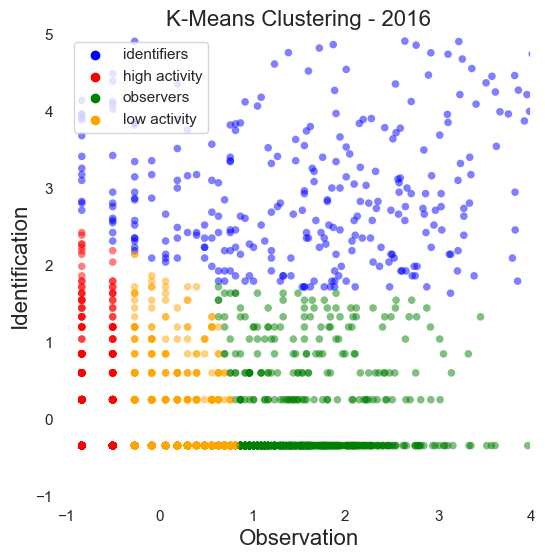

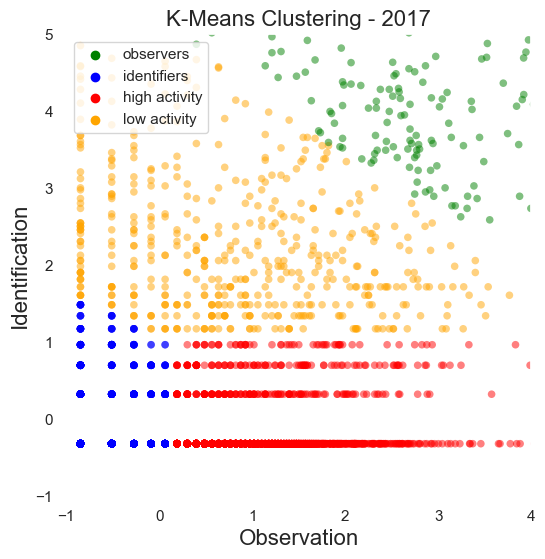

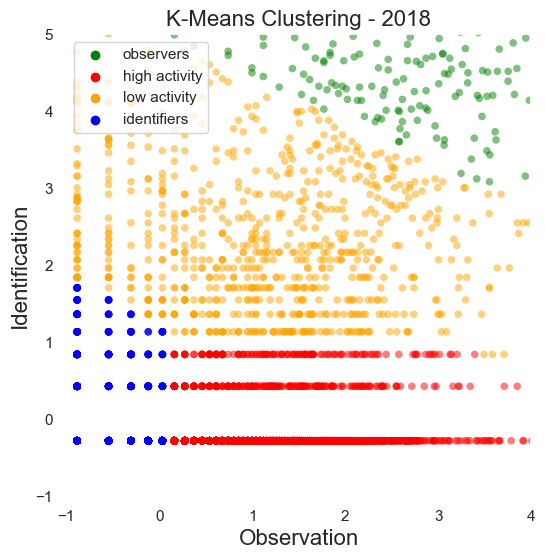

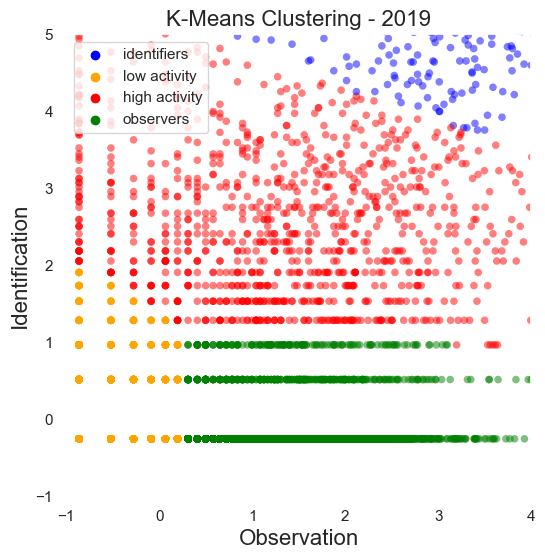

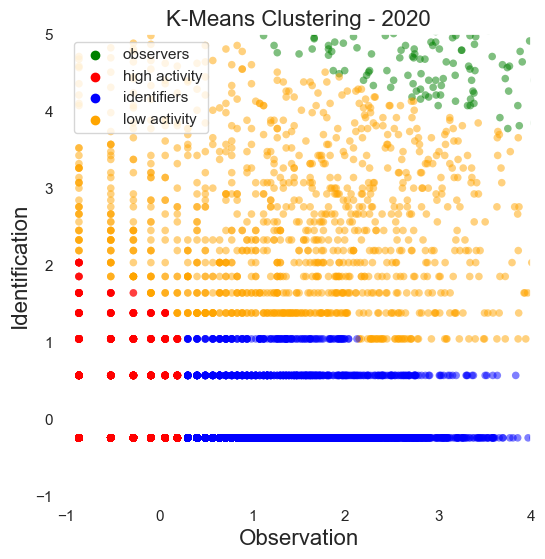

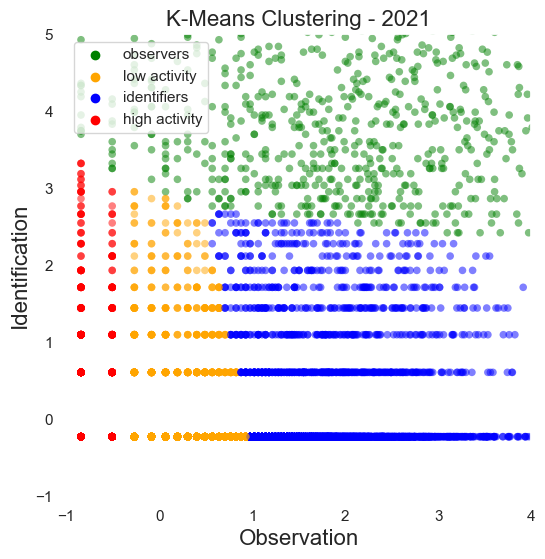

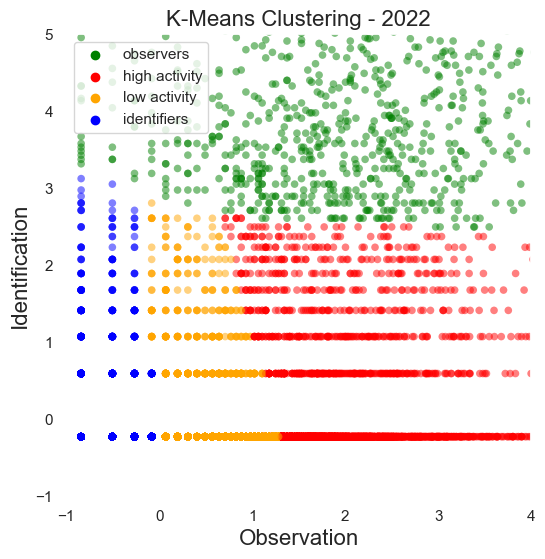

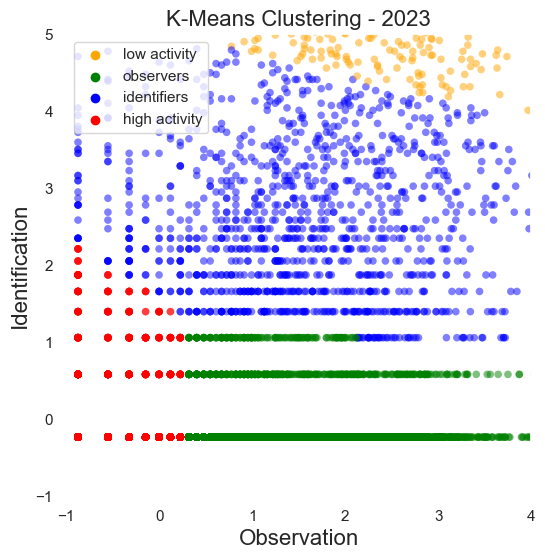

In [48]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    process_dataframe(df)  

In [38]:
iden = c.loc[c['user_type']=='identifiers']
iden.head().sort_values('user_id')

NameError: name 'c' is not defined

In [39]:
#test 
higha = c.loc[c['user_type']=='high activity']
higha.head().sort_values('user_id')

NameError: name 'c' is not defined

In [51]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_std_2016[['obs_count_2016', 'ident_count_2016']], kmeans.labels_)


NameError: name 'df_std_2016' is not defined

In [52]:
def cluster_and_visualize(df, city, year):
    color_dict = {'high activity':'red',
                  'identifiers':'blue',
                  'observers':'green',
                  'low activity':'orange'}
    label_dict = {0:'high activity', 1:'identifiers', 2:'observers', 3:'low activity'}
    
    kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000).fit(df[['obs_count', 'ident_count']])
    df[f'cluster_{year}'] = kmeans.labels_
    df[f'user_type{year}'] = [label_dict.get(i) for i in df[f'cluster_{year}']]
    
    sns.set(rc={'axes.facecolor':'EFEFEF'})
    ax = plt.figure(figsize=(10,8))
    ax = plt.axes()
    sns.set(style="ticks")
    ax = sns.scatterplot(data=df, x=f'obs_count_{year}', y=f'ident_count_{year}',
                         hue=f'user_type{year}',
                         palette=color_dict,
                         s=80, linewidth=0, alpha=0.5)
    sns.set_style("ticks")
    plt.legend(loc='upper left')
    plt.title(f'{city} {year}', fontsize=16)
    plt.xlabel('observation', fontsize=16)
    plt.ylabel('Identification', fontsize=16)
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
    ax.set_facecolor("white")
    plt.savefig(f'{city}_{year}_scatter.png')
    plt.show()
    return df


In [53]:
from sklearn.cluster import DBSCAN

def perform_dbscan_clustering(df, eps=0.5, min_samples=5):
    label_dict = {0: 'high activity', 1: 'identifiers', 2: 'observers', 3: 'low activity'}

    # Initialize and fit DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df['cluster'] = dbscan.fit_predict(df[['obs_count_scaled', 'ident_count_scaled']])

    # Map cluster labels to user types using label_dict
    df['user_type'] = df['cluster'].map(label_dict)

    # Filter out noise points (cluster label = -1)
    df = df[df['cluster'] != -1]

    # Sort the DataFrame by 'user_id'
    df = df.sort_values('user_id')

    return df

In [55]:
def process_dataframe_dbscan(df):
    # Log transformation
    df_log = transform_data(df)
    
    # K-Means Clustering on log transfored data
    df_clustered = perform_dbscan_clustering(df_log)
    
    #visualise
    visualize_clusters(df_clustered,year)
    
    return df


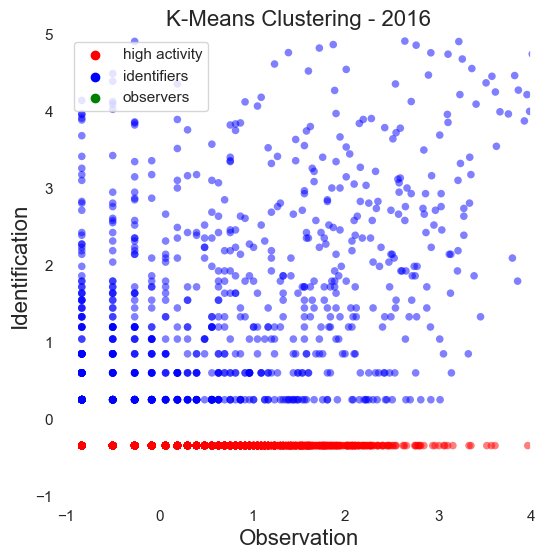

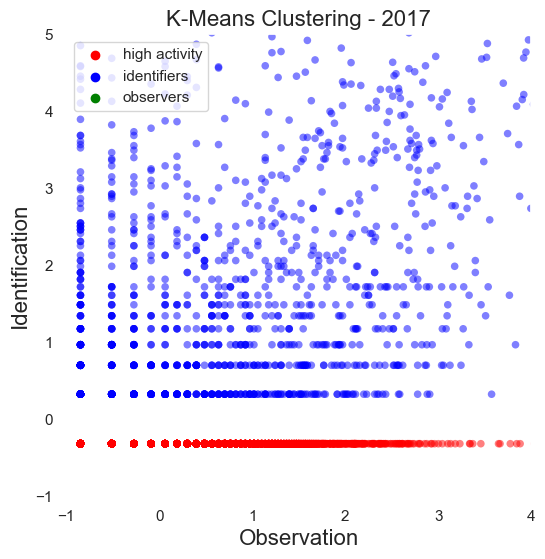

In [ ]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    process_dataframe_dbscan(df)  